In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings as wg
import textwrap

from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

wg.filterwarnings('ignore')

In [20]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

In [21]:
population_df = pd.read_csv('population_df_clean_after_1996.csv')
migration_df = pd.read_csv('migration_df_clean_after_1996.csv')

**Encoding categorical variables and scaling the 'VALUE' column.**

In [22]:
# Initialize LabelEncoder and StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

# Encoding categorical variables for the migration dataset
migration_df['Sex_encoded'] = le.fit_transform(migration_df['Sex'])
migration_df['Origin_or_Destination_encoded'] = le.fit_transform(migration_df['Origin or Destination'])

# Scaling the 'VALUE' column
migration_df['VALUE_scaled'] = scaler.fit_transform(migration_df[['VALUE']])

# Now let's do a similar preprocessing for the population dataset
# For 'Single Year of Age' we need to check if it's a range or single years which can be treated as numeric
population_df['Age'] = population_df['Single Year of Age'].str.extract('(\d+)').astype(float)  # Extract numbers and convert to float
population_df['Sex_encoded'] = le.fit_transform(population_df['Sex'])

# Scaling the 'VALUE' column
population_df['VALUE_scaled'] = scaler.fit_transform(population_df[['VALUE']])

# Show the first few rows of the preprocessed dataframes
migration_df

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE,Sex_encoded,Origin_or_Destination_encoded,VALUE_scaled
0,1996,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,1.7,1,2,-0.521938
1,1996,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,6.7,1,0,-0.070776
2,1996,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,8.4,1,1,0.082618
3,1996,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,1.8,0,2,-0.512915
4,1996,GB1,United Kingdom (1),2,Female,4,Emigrants: All destinations,Thousand,7.4,0,0,-0.007614
...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,1,Male,4,Emigrants: All destinations,Thousand,3.6,1,0,-0.350497
1142,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,1,Male,5,Immigrants: All origins,Thousand,3.9,1,1,-0.323427
1143,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,2,Female,1,Net migration,Thousand,-0.2,0,2,-0.693379
1144,2023,E15E2720,EU15 to EU27 (accession countries joined post ...,2,Female,4,Emigrants: All destinations,Thousand,5.2,0,0,-0.206125


In [23]:
# Show the first few rows of the preprocessed dataframes
population_df

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE,Age,Sex_encoded,VALUE_scaled
0,1996,200,Under 1 year,1,Male,Number,25231,1.0,1,0.260438
1,1996,200,Under 1 year,2,Female,Number,23623,1.0,0,0.127061
2,1996,1,1 year,1,Male,Number,24963,1.0,1,0.238208
3,1996,1,1 year,2,Female,Number,23611,1.0,0,0.126066
4,1996,2,2 years,1,Male,Number,25245,2.0,1,0.261599
...,...,...,...,...,...,...,...,...,...,...
5595,2023,97,97 years,2,Female,Number,821,97.0,0,-1.764268
5596,2023,98,98 years,1,Male,Number,197,98.0,1,-1.816026
5597,2023,98,98 years,2,Female,Number,632,98.0,0,-1.779945
5598,2023,646,99 years and over,1,Male,Number,352,99.0,1,-1.803169


The Distribution of Migration histogram shows a right-skewed distribution, indicating that
lower migration values are more common, with fewer instances of very high migration
values.


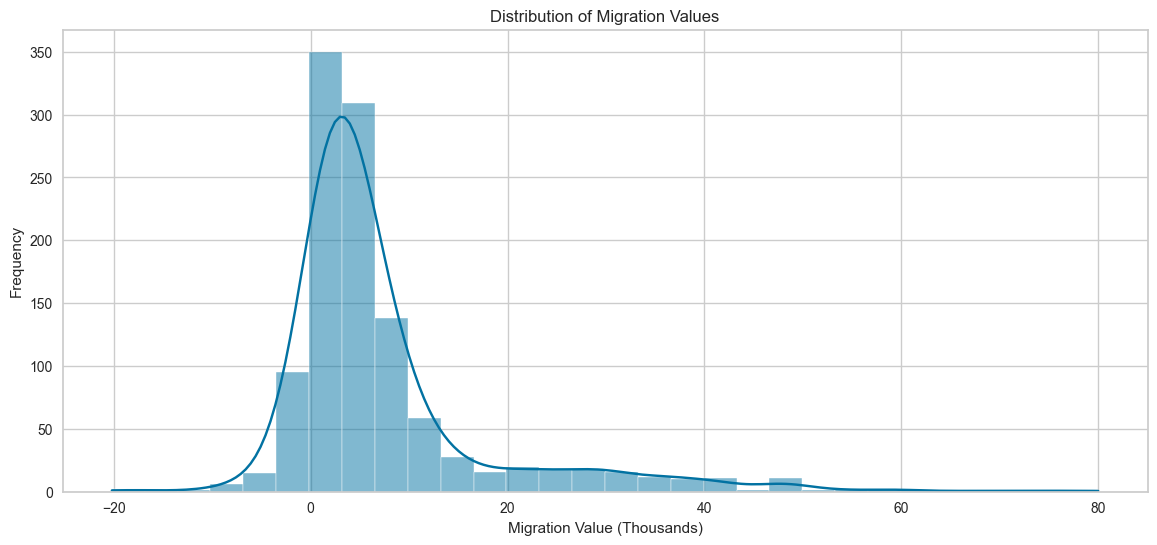

The Migration Over the Years line plot suggests an overall increasing trend in migration
over the years with some fluctuations.


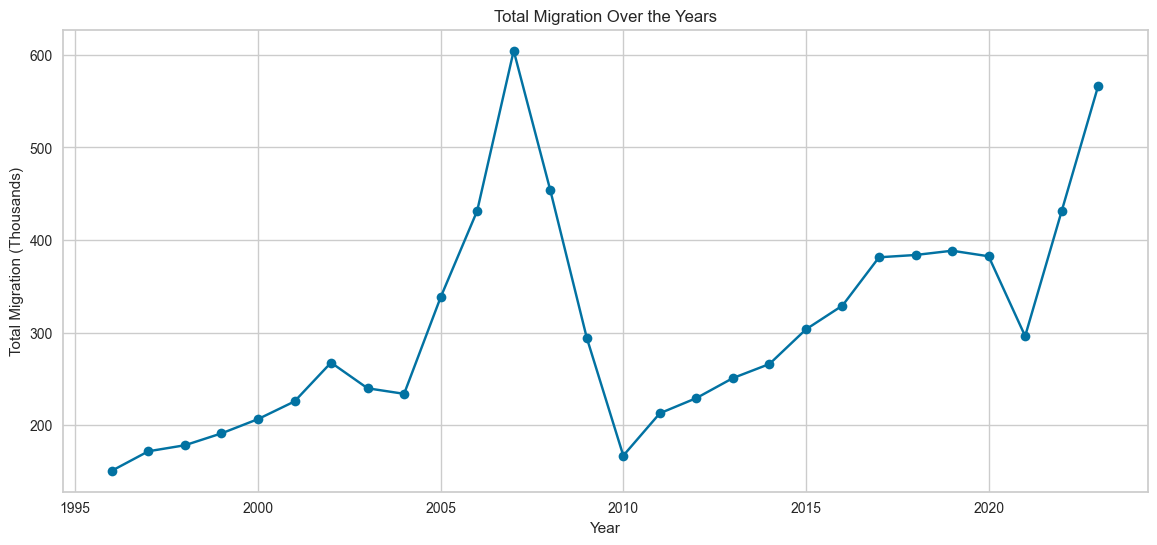

The population values are also right-skewed, similar to the migration data, suggesting
that lower population numbers per age and sex category are more common.


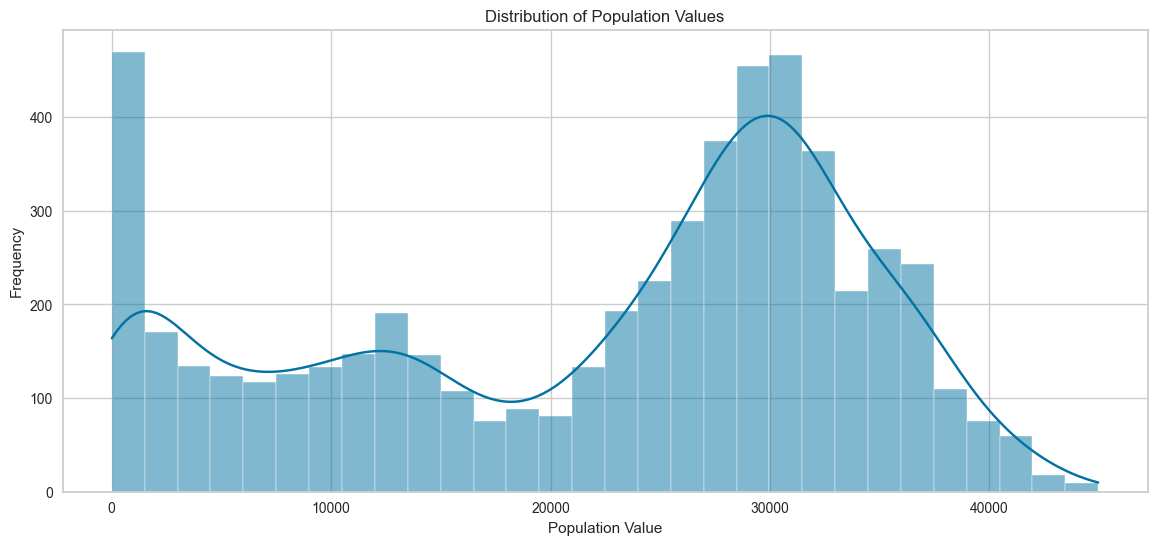

There is a clear upward trend in the total population over the years, indicating
population growth.


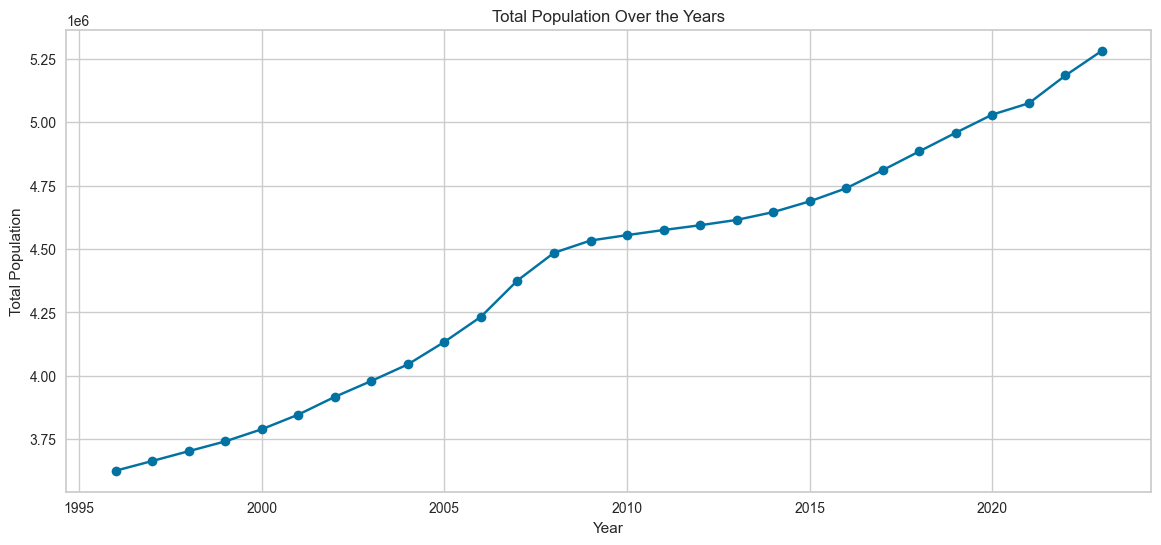

In [24]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

text = "The Distribution of Migration histogram shows a right-skewed distribution, indicating that lower migration values are more common, with fewer instances of very high migration values."
print('\033[1m' + textwrap.fill(text, width=90) + '\033[0m')
# Histogram for the distribution of migration values
plt.figure(figsize=(14, 6))
sns.histplot(migration_df['VALUE'], bins=30, kde=True)
plt.title('Distribution of Migration Values')
plt.xlabel('Migration Value (Thousands)')
plt.ylabel('Frequency')
plt.show()


text = 'The Migration Over the Years line plot suggests an overall increasing trend in migration over the years with some fluctuations.'
print('\033[1m' + textwrap.fill(text, width=90) + '\033[0m')
# Line plot for total migration over the years
migration_yearly_totals = migration_df.groupby('Year')['VALUE'].sum()
plt.figure(figsize=(14, 6))
migration_yearly_totals.plot(title='Total Migration Over the Years', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Migration (Thousands)')
plt.show()


text = 'The population values are also right-skewed, similar to the migration data, suggesting that lower population numbers per age and sex category are more common.'
print('\033[1m' + textwrap.fill(text, width=90) + '\033[0m')
# Histogram for the distribution of population values
plt.figure(figsize=(14, 6))
sns.histplot(population_df['VALUE'], bins=30, kde=True)
plt.title('Distribution of Population Values')
plt.xlabel('Population Value')
plt.ylabel('Frequency')
plt.show()


text = 'There is a clear upward trend in the total population over the years, indicating population growth.'
print('\033[1m' + textwrap.fill(text, width=90) + '\033[0m')
# Line plot for total population over the years
population_yearly_totals = population_df.groupby('Year')['VALUE'].sum()
plt.figure(figsize=(14, 6))
population_yearly_totals.plot(title='Total Population Over the Years', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.show()

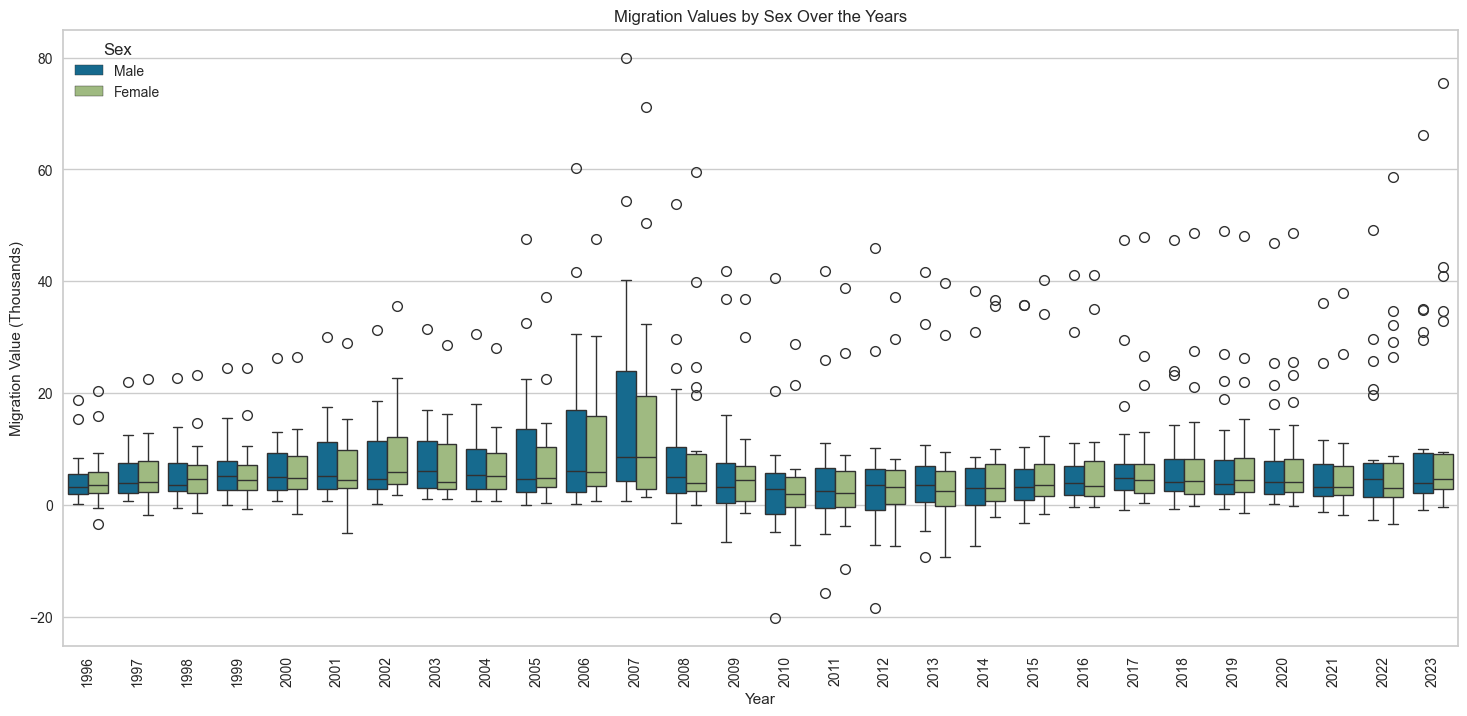

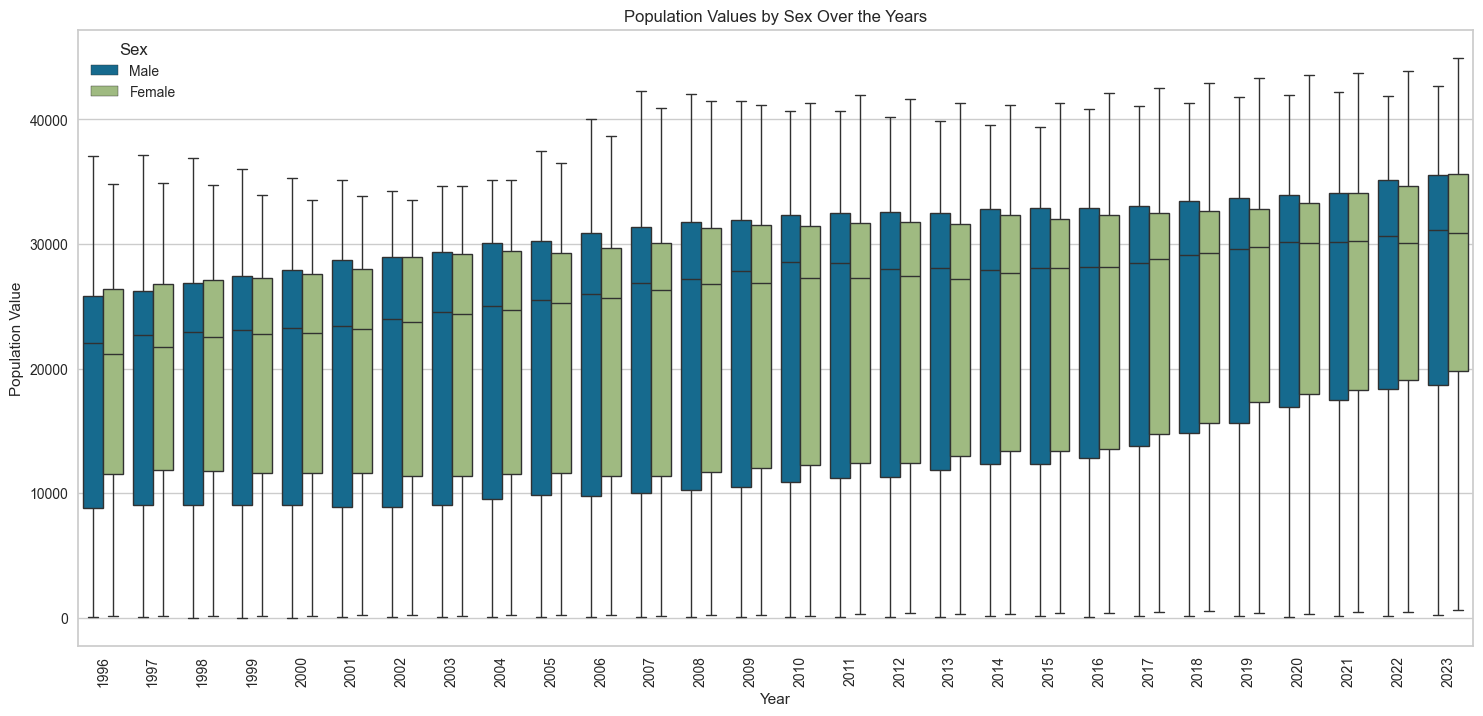

In [25]:
# Migration comparison by Sex
plt.figure(figsize=(18, 8))
sns.boxplot(x='Year', y='VALUE', hue='Sex', data=migration_df)
plt.title('Migration Values by Sex Over the Years')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Migration Value (Thousands)')

plt.show()

# Population comparison by Sex
plt.figure(figsize=(18, 8))
sns.boxplot(x='Year', y='VALUE', hue='Sex', data=population_df)
plt.title('Population Values by Sex Over the Years')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Population Value')

plt.show()

# Correlation analysis between total migration and total population for each year
# We need to calculate the total migration and total population per year
total_migration_by_year = migration_df.groupby('Year')['VALUE'].sum().reset_index()
total_population_by_year = population_df.groupby('Year')['VALUE'].sum().reset_index()

# Merge the two datasets on the year for correlation analysis
merged_data = pd.merge(total_migration_by_year, total_population_by_year, on='Year', suffixes=('_migration', '_population'))
correlation = merged_data[['VALUE_migration', 'VALUE_population']].corr()

**Visual Comparison by Sex:**\
The boxplots for migration values show some variation over the years, but there doesn't seem to be a consistent trend or significant difference between male and female migration values from the visual inspection. The same is observed for population values, with no clear and consistent differences between the sexes over the years.

**Correlation Analysis:**\
There is a moderate positive correlation (r≈0.6) between total migration and total population for each year. This suggests that as the population increases, migration also tends to increase, but this relationship is not perfectly linear and other factors may also influence migration trends.
These analyses can help inform our machine learning models by highlighting the importance of considering both temporal trends and potential differences by sex. It's important to note that correlation does not imply causation, and further analysis would be needed to understand the causal relationships.

We have now completed an initial EDA, which gives us a clearer understanding of the data and potential factors to consider in our machine learning models. The next step would be to move on to the machine learning modeling phase where we apply clustering techniques to uncover patterns in the data.

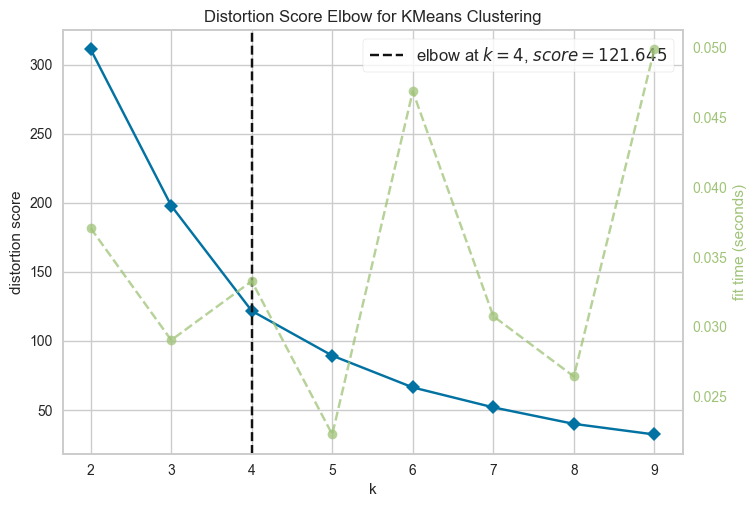

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# We will use the scaled 'VALUE' for clustering
X_migration_scaled = migration_df[['VALUE_scaled']].values

# Initialize the KMeans model
model = KMeans(random_state=42)

# Using the yellowbrick library to plot the Elbow Method for optimal k
visualizer = KElbowVisualizer(model, k=(2,10))

# Fit the data and visualize
visualizer.fit(X_migration_scaled)
visualizer.show()


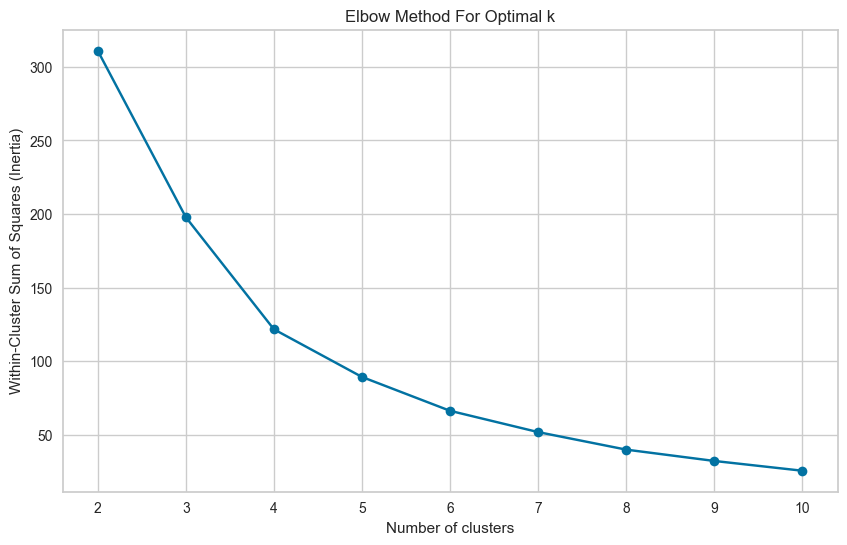

In [27]:
# We'll implement the Elbow Method without yellowbrick
# Computing the within-cluster sum of squares for different numbers of clusters

# Determining the range of cluster numbers to try
cluster_range = range(2, 11)

# List to hold the within-cluster sum of squares for each k
inertias = []

for k in cluster_range:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model
    kmeans.fit(X_migration_scaled)
    # Append the inertia to the list
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(cluster_range)
plt.show()

In [28]:
# Extracting the 'VALUE' column for clustering
X = migration_df[['VALUE']].values

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original dataframe
migration_df['Cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
migration_df[['Year', 'Country', 'Sex', 'VALUE', 'Cluster']]


,Year,Country,Sex,VALUE,Cluster
0,1996,United Kingdom (1),Male,1.7,3
1,1996,United Kingdom (1),Male,6.7,0
2,1996,United Kingdom (1),Male,8.4,0
3,1996,United Kingdom (1),Female,1.8,3
4,1996,United Kingdom (1),Female,7.4,0
...,...,...,...,...,...
1141,2023,EU15 to EU27 (accession countries joined post ...,Male,3.6,3
1142,2023,EU15 to EU27 (accession countries joined post ...,Male,3.9,3
1143,2023,EU15 to EU27 (accession countries joined post ...,Female,-0.2,3
1144,2023,EU15 to EU27 (accession countries joined post ...,Female,5.2,0


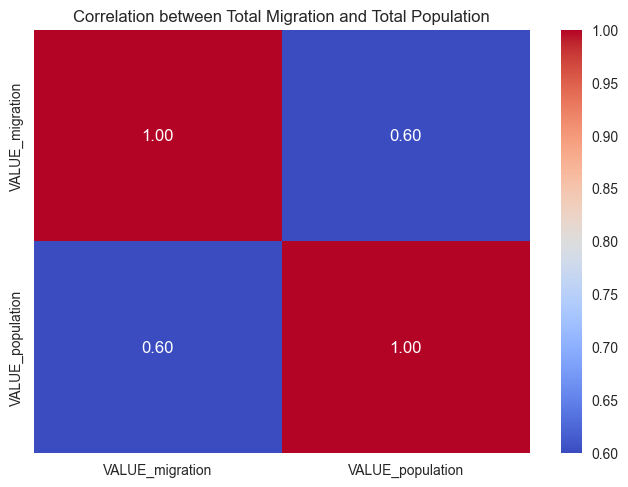

In [29]:
# Display the correlation
correlation_display = sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Total Migration and Total Population')
plt.show()

In [30]:
# Since we have already fitted a KMeans model with 4 clusters, we can calculate the silhouette score
silhouette_avg = silhouette_score(X_migration_scaled, kmeans.labels_)

# Profiling clusters: For each cluster, we will calculate the mean and count
cluster_profiles = migration_df.groupby('Cluster')['VALUE'].agg(['mean', 'count']).reset_index()

# Displaying the silhouette score and cluster profiles
silhouette_avg, cluster_profiles

(0.5522073388711507,
    Cluster       mean  count
 0        0   8.493768    353
 1        1  49.341667     36
 2        2  27.549495     99
 3        3   1.633891    658)